In [13]:
from langgraph.graph import StateGraph ,START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [14]:
load_dotenv()
model = ChatOpenAI(model="gpt-5-nano-2025-08-07")

In [15]:
class PromptChainState(TypedDict):
    topic: str
    outline: str
    evaluation: str
    report: str

In [16]:
def create_outline(state: PromptChainState) -> PromptChainState:
    prompt = f"Create detailed outline on the topic: {state['topic']} so that i can generate blog post from that output"
    state["outline"] = model.invoke(prompt).content
    return state

def generate_report(state: PromptChainState) -> PromptChainState:
    prompt = f"Generate a detailed report on the topic: {state['topic']} using the outline: {state['outline']}"
    state["report"] = model.invoke(prompt).content
    return state

def evaluate_report(state: PromptChainState) -> PromptChainState:
    prompt = f"Evaluate the report on the topic: {state['topic']} using the outline: {state['outline']}"
    state["evaluation"] = model.invoke(prompt).content
    return state


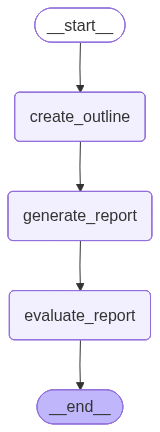

In [17]:
graph =StateGraph(PromptChainState)

graph.add_node("create_outline", create_outline)
graph.add_node("generate_report", generate_report)
graph.add_node("evaluate_report", evaluate_report)

graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "generate_report")
graph.add_edge("generate_report", "evaluate_report")
graph.add_edge("evaluate_report", END)

workflow = graph.compile()
workflow

In [18]:
final_output = workflow.invoke({"topic": "AI in India and how it will affect Job Market"})

In [19]:
final_output["outline"]

'Here is a detailed outline you can use to generate a blog post about AI in India and its impact on the job market. It’s structured to be writer-friendly and adaptable for long-form posts, guides, or a series.\n\nTitle options (pick 1 or mix elements)\n- AI in India: Redefining Jobs, Skills, and Opportunity by 2030\n- The AI Boom in India: What It Means for Jobs, Skills, and the Economy\n- Navigating AI-Powered Transformation: India’s Job Market in the 2020s and Beyond\n- From Education to Employment: How AI Will Shape India\'s Workforce\n\nTarget audience\n- Tech professionals, students and job seekers, HR and leadership in Indian companies, policymakers, educators\n\nCore thesis (one-sentence guiding idea)\n- AI adoption in India is accelerating, and while certain routine roles may shrink, a broad set of new jobs and transformed roles will emerge; success for India will hinge on skills development, policy support, responsible AI adoption, and sectoral strategies.\n\nExecutive summary

In [20]:
final_output["report"]

'AI in India: Redefining Jobs, Skills, and Opportunity by 2030\n\nExecutive summary\n- India sits at a pivotal juncture for AI. With a fast-growing AI ecosystem, a large, young workforce, and ongoing government and private-sector investments, the country is shaping how AI will augment and transform work across sectors.\n- The central job-market question is not simply displacement versus creation, but how quickly and equitably India can retrain, redeploy, and re-skill its talent. The winners will be firms and workers who pair AI adoption with strong governance, sector-specific strategies, and durable upskilling pipelines.\n\n1) Introduction: Why AI and India matter\n- This post looks at the current state of AI in India, how it’s reshaping jobs today, and where it will likely go over the next decade. It covers the landscape, sectoral impacts, skills, policy, and practical actions for readers—whether you’re a student, professional, HR lead, educator, or policymaker.\n- Quick context: Indi

In [21]:
final_output["evaluation"]

'Here’s a structured evaluation of the outline you shared for a blog post on AI in India and its impact on the job market. I’ll flag strengths, gaps, and concrete improvements, plus practical next steps. I can also tailor the outline to a specific angle or generate a starter draft if you want.\n\nOverall assessment\n- Strengths: The outline is comprehensive and well-suited for a long-form, multi-part post. It starts with context, covers current landscape, dissects sectoral impacts, addresses skills and education, policy and ethics, regional/demographic considerations, and ends with practical actions and a long-term view. It explicitly targets diverse stakeholders (tech professionals, students, HR, policymakers, educators) and includes SEO-oriented notes, visuals, and appendices. The structure moves from macro to micro (landscape → jobs today → future reshaping → sector specifics → skills → policy → regional/demographic considerations → case studies → risks → practical recommendations →